# 요구사항 분석 및 문제정의

- 간단한 EDA와 관련된 함수를 학습
- BMI데이터를 확인해 보고 잘 분류가 될 수 있는지 시각화
- KNN의 개념에 대해서 학습
- KNN을 이용해서 학습
- 머신러닝 프로세스에 대해 학습

# 데이터 수집

In [2]:
import pandas as pd

bmi=pd.read_csv("./data/bmi_500.csv")


# EDA (탐색적 데이터 분석)

In [3]:
bmi.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


In [4]:
#처음부터 일부 데이터를 확인
#괄호안에 숫자를 입력하면 해당 숫자만큼 출력

In [5]:
#데이터의 정보를 출력하는 함수
#데이터의 수, 컬럼의 수, 컬럼의 특성/ 데이터 타입- 결측치 확인
#Dtype: object(범주형), int/float(수치형)

bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [7]:
# 범주형 컬럼의 클래스의 목록을 보는 함수 
print(bmi['Gender'].unique())

['Male' 'Female']


In [8]:
#범주형 컬럼의 클래스별 갯수를 확인 
#데이터가 한쪽으로 치우쳐 있는지 확인
print(bmi['Gender'].value_counts())

Female    255
Male      245
Name: Gender, dtype: int64


In [10]:
#수치형 데이터의 편향(치우침)확인 하는 함수
#0이면 정규분포, (0에 가까울수록 중앙- 치우쳐있지 않다. )
#양수이면 왼쪽으로 치우친 데이터이고 음수이면 오른쪽으로 치우친 데이터를 표시
print(bmi['Height'].skew())
print(bmi['Weight'].skew())

-0.12191368980139153
-0.037692236922098034


In [12]:
# 데이터의 간단한 기술 통계를 보여주는 함수
#데이터의 개수, 평균, 표준편차, 최소/25%/중간값/75%/최대값
#결측치, 이상치, 편향(치우침 정도)
bmi.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [13]:
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


## bmi데이터가 분류가 될수 있는 데이터 인지 확인

In [14]:
#matplotlib: 파이썬 그래프 시각화 도구
# seaborn: matplotlib에 고급 그래프 시각화 도구를 제공

import matplotlib.pyplot as plt

#scatter: 산포도를 그리는 함수(2차원 좌표에 점을 찍는 함수 )
#x좌표:Weight, y좌표: Height

def myScatter(label, color):
    #파라미터로 넘어온 라벨의 해당 값들을 저장-불리언 인덱싱 
    tmp=bmi[bmi['Label']==label]
    
    #입력한 라벨값만 산포도를 그림
    #scatter(x좌표, y좌표, 색상, 라벨)
    plt.scatter(tmp['Weight'],tmp['Height'], c=color, label=label)

In [15]:
bmi['Label'].unique()

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

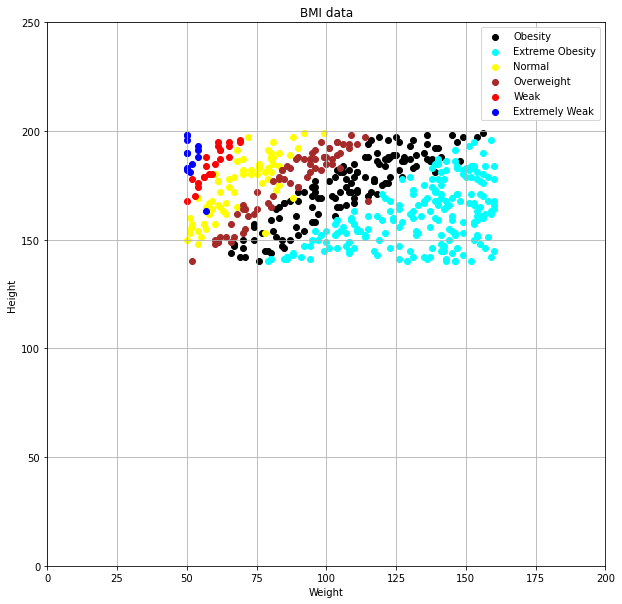

In [35]:
#그래프의 크기 설정
plt.figure(figsize=(10,10))


myScatter('Obesity',"black")
myScatter('Extreme Obesity',"aqua")
myScatter('Normal',"yellow")
myScatter('Overweight',"brown")
myScatter('Weak',"red")
myScatter('Extremely Weak',"blue")

# 범례추가(loc: 범례의 위치)
#loc를 써주지 않으면 알아서 데이터가 가장 작게 분포된 위치에 표시
plt.legend(loc="upper right")

#x축 라벨 표시(기본적으로 한글은 지원하지 않는다.)
plt.xlabel("Weight")

#y축 라벨 표시
plt.ylabel("Height")

#x축 눈금의 범위
plt.xlim(0,200)

#y축 눈금의 범위
plt.ylim(0,250)

#제목 표시
plt.title("BMI data")

#격차표시
plt.grid()

## 학습 데이터로 변환

- 특성데이터와 라벨 데이터로 분리
- 훈련 데이터와 테스트 데이터로 분리


In [36]:
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [45]:
# 특성 데이터와 라벨데이터로 분리
bmi_X=bmi[['Height','Weight']]
bmi_y=bmi['Label']



In [46]:
bmi_y.shape

(500,)

In [47]:
bmi_X.shape

(500, 2)

In [61]:
#훈련 데이터와 테스트 데이터로 분리(훈련 70%, 테스트 30%)
X_train=bmi_X.iloc[:350,:]
y_train=bmi_y[:350]
X_test=bmi_X.iloc[350:,:]
y_test=bmi_y[350:]

In [62]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((350, 2), (350,), (150, 2), (150,))